In [215]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import json

In [2]:
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20


In [18]:
N = 3500    # frame_range

with open('../results/28-60_1-4000-analysed.json', 'r') as f:
    t_1, t_er1, S_den1 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-60_2-4000-analysed.json', 'r') as f:
    t_2, t_er2, S_den2 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-60_3-4000-analysed.json', 'r') as f:
    t_3, t_er3, S_den3 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-60_4-4000-analysed.json', 'r') as f:
    t_4, t_er4, S_den4 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-60_5-4000-analysed.json', 'r') as f:
    t_5, t_er5, S_den5 = [sublist[:N] for sublist in np.transpose(json.load(f))]

/tmp/ipykernel_3808/597631314.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t_1[:]), np.log10(S_den1[:]), label = '60V_1')
/tmp/ipykernel_3808/597631314.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t_2[:]), np.log10(S_den2[:]), label = '60V_2')
/tmp/ipykernel_3808/597631314.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t_3[:]), np.log10(S_den3[:]), label = '60V_3')
/tmp/ipykernel_3808/597631314.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t_4[:]), np.log10(S_den4[:]), label = '60V_4')
/tmp/ipykernel_3808/597631314.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t_5[:]), np.log10(S_den5[:]), label = '60V_5')


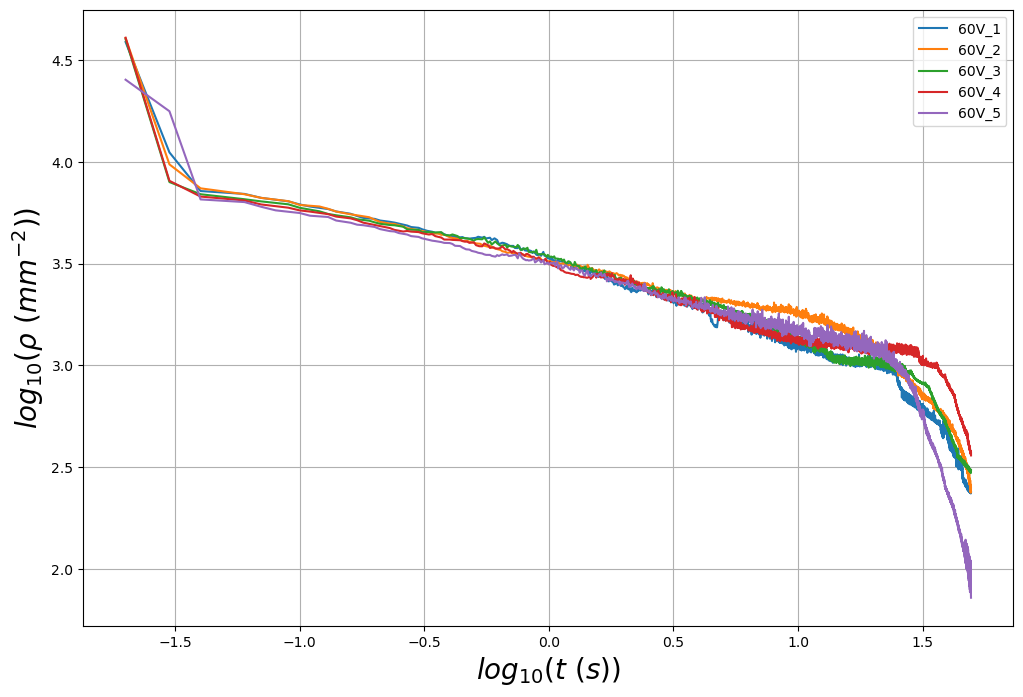

In [34]:
fig = plt.figure(figsize=(12, 8))

plt.plot(np.log10(t_1[:]), np.log10(S_den1[:]), label = '60V_1')
plt.plot(np.log10(t_2[:]), np.log10(S_den2[:]), label = '60V_2')
plt.plot(np.log10(t_3[:]), np.log10(S_den3[:]), label = '60V_3')
plt.plot(np.log10(t_4[:]), np.log10(S_den4[:]), label = '60V_4')
plt.plot(np.log10(t_5[:]), np.log10(S_den5[:]), label = '60V_5')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()
# plt.savefig('../figs/raw-combind-rho_dyn.png')

## Late Time Coarsening Dynamics

/tmp/ipykernel_3808/2830890253.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den1), label = '60V_1')
/tmp/ipykernel_3808/2830890253.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den2), label = '60V_2')
/tmp/ipykernel_3808/2830890253.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den3), label = '60V_3')
/tmp/ipykernel_3808/2830890253.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den4), label = '60V_4')
/tmp/ipykernel_3808/2830890253.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den5), label = '60V_5')


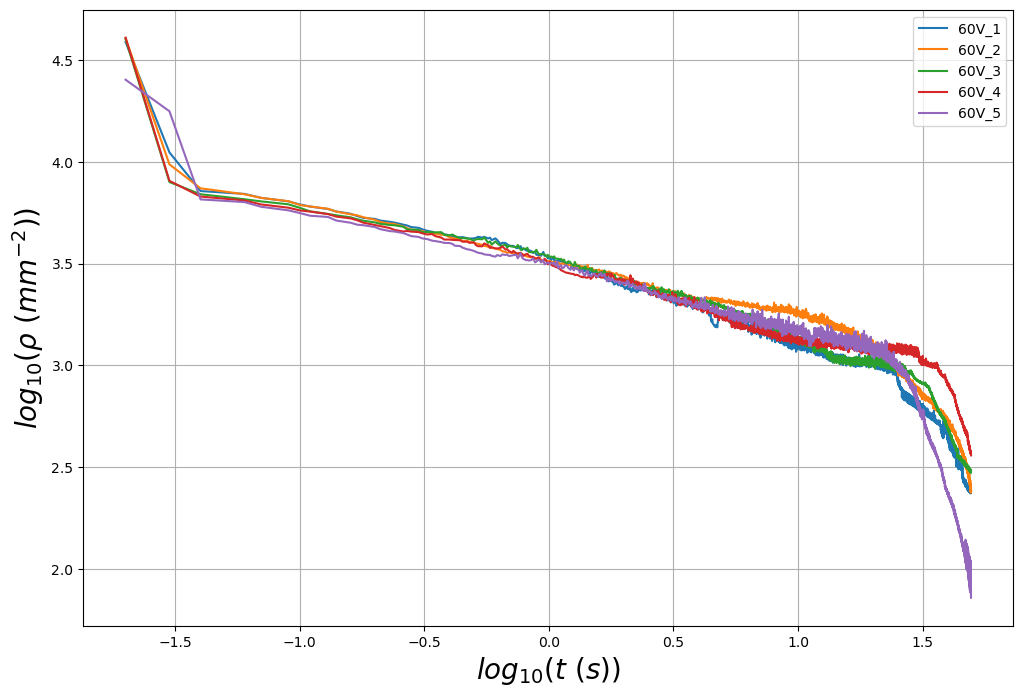

In [184]:
fig = plt.figure(figsize=(12, 8))

t = np.median([t_1, t_2, t_3, t_4, t_5], axis=0)
plt.plot(np.log10(t), np.log10(S_den1), label = '60V_1')
plt.plot(np.log10(t), np.log10(S_den2), label = '60V_2')
plt.plot(np.log10(t), np.log10(S_den3), label = '60V_3')
plt.plot(np.log10(t), np.log10(S_den4), label = '60V_4')
plt.plot(np.log10(t), np.log10(S_den5), label = '60V_5')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

/tmp/ipykernel_3808/4021963345.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den_avg), label = '60V')
/tmp/ipykernel_3808/4021963345.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)


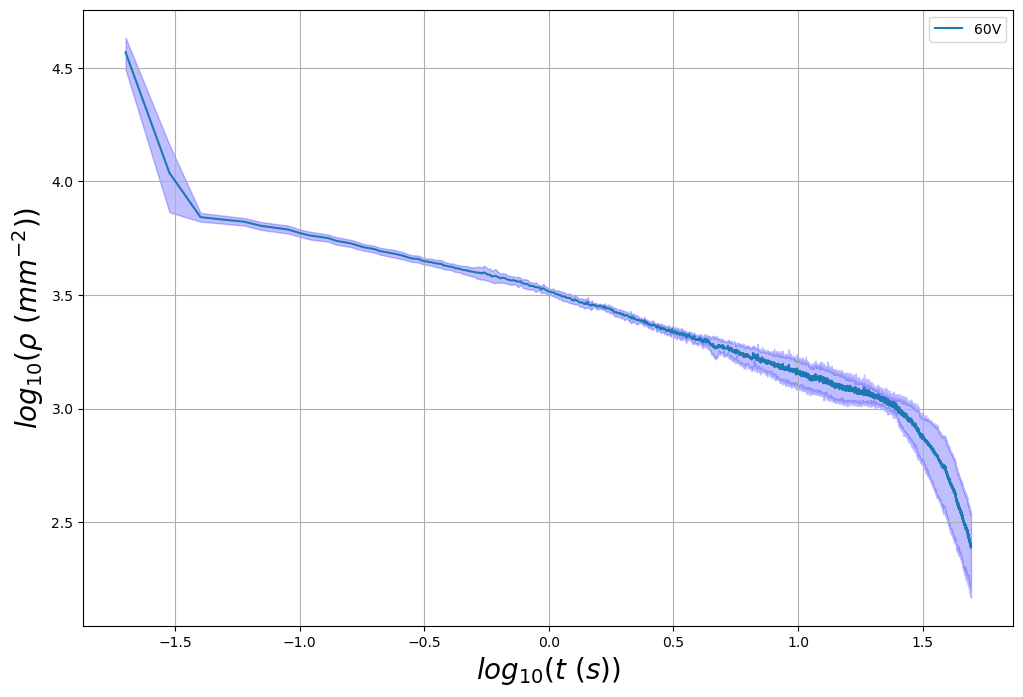

In [185]:
fig = plt.figure(figsize=(12, 8))

S_den_avg = np.array(np.average([S_den1, S_den2, S_den3, S_den4, S_den5], axis=0))
S_den_sd = np.array(np.std([S_den1, S_den2, S_den3, S_den4, S_den5], axis=0))

plt.plot(np.log10(t), np.log10(S_den_avg), label = '60V')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

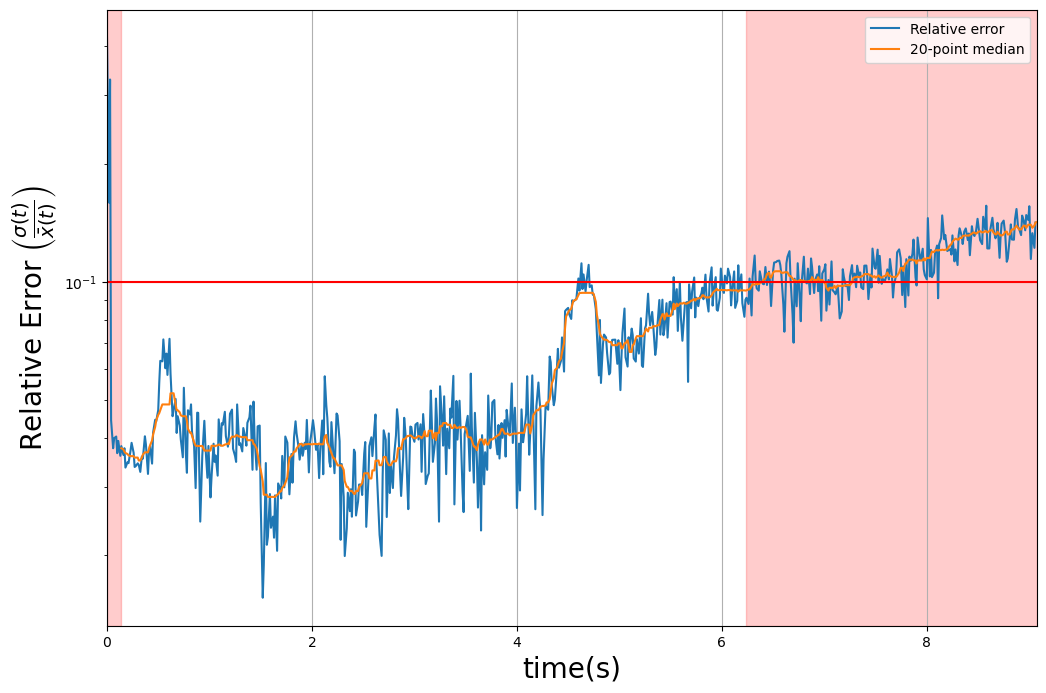

In [217]:
fig = plt.figure(figsize=(12, 8))

ferr_th = 0.1
ferr = S_den_sd/S_den_avg
avg_ferr = np.array([np.median((ferr)[i:i+20]) for i in range(len(ferr) - 20)])
a, b = 10, np.where(avg_ferr[:]>ferr_th)[0][0]

plt.plot(t[0:b+200], (S_den_sd/S_den_avg)[0:b+200], label='Relative error')
plt.plot(t[10:-10][:b+200], avg_ferr[:b+200], label='20-point median')
plt.yscale('log')
plt.xlim([t[0], t[b+200]])
# plt.yticks(np.linspace(min((S_den_sd/S_den_avg)[0:b+200]), max((S_den_sd/S_den_avg)[0:b+200]), 10))  # 10 y-ticks
plt.legend(loc=1)
plt.xlabel('time(s)')
plt.ylabel(r'Relative Error $\left( \frac{\sigma(t)}{\bar{x}(t)}\right)$')
plt.axvspan(xmin=t[b], xmax=t[b+200] , color='red', alpha=0.2, label='Discarded regions')
plt.axvspan(xmin=t[0], xmax=t[a] , color='red', alpha=0.2, label='Discarded regions')
plt.hlines(y= ferr_th, xmin=t[0], xmax=t[b+200],color='red')
plt.grid()
plt.savefig('../figs/datapoint_selection_criteria.png')

(array([-0.33211468,  3.50457132]), array([0.04062613]), np.int32(2), array([1.32154499, 0.50350654]), np.float64(9.592326932761353e-14))


/tmp/ipykernel_3808/2651749217.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den_avg), label ='60V')
/tmp/ipykernel_3808/2651749217.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(np.log10(t), np.log10(S_den_avg-1*S_den_sd), np.log10(S_den_avg+1*S_den_sd), color='blue', alpha=0.25)


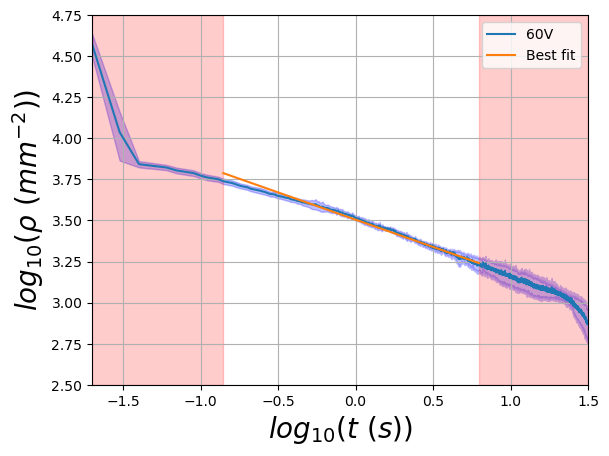

In [194]:

res = np.polyfit(np.log10(t[a:b]), np.log10(2*S_den_avg[a:b]), deg=1, full=True)
print(res)

plt.plot(np.log10(t), np.log10(2*S_den_avg), label ='60V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b]) + res[0][1], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-1*S_den_sd), np.log10(S_den_avg+1*S_den_sd), color='blue', alpha=0.25)
plt.axvspan(xmin=-1.7, xmax=np.log10(t[a]), color='red', alpha=0.2)
plt.axvspan(xmin=np.log10(t[b]), xmax=1.5, color='red', alpha=0.2)
plt.xlim([-1.7, 1.5])
plt.ylim([2.5, 4.75])
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend(loc=1)

(array([-0.05222648, -0.31334441,  3.51195407]), array([0.01226556]), np.int32(3), array([1.61619269, 0.50693649, 0.36185162]), np.float64(9.592326932761353e-14))


/tmp/ipykernel_3808/1659695118.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den_avg), label ='60V')
/tmp/ipykernel_3808/1659695118.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)


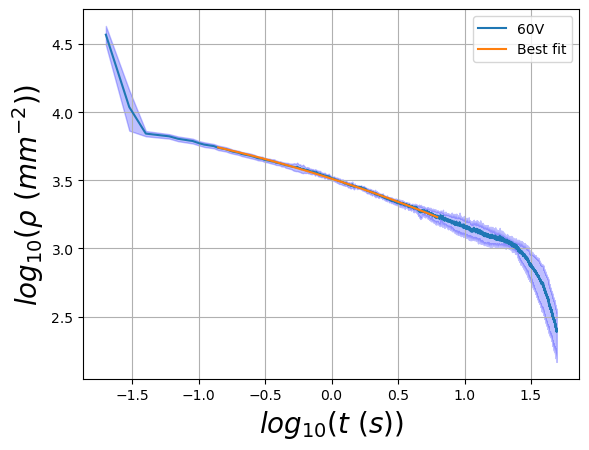

In [188]:

res = np.polyfit(np.log10(t[a:b]), np.log10(S_den_avg[a:b]), deg=2, full=True)
print(res)

plt.plot(np.log10(t), np.log10(S_den_avg), label ='60V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b])**2 + res[0][1]*np.log10(t[a:b]) + res[0][2], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

(array([-2.12484255,  6.0744828 ]), array([0.95021779]), np.int32(2), array([1.41390357, 0.02960911]), np.float64(3.1086244689504383e-13))


/tmp/ipykernel_3808/3043824695.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(t), np.log10(S_den_avg), label ='60V')
/tmp/ipykernel_3808/3043824695.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(np.log10(t), np.log10(S_den_avg-2*S_den_sd), np.log10(S_den_avg+2*S_den_sd), color='blue', alpha=0.25)


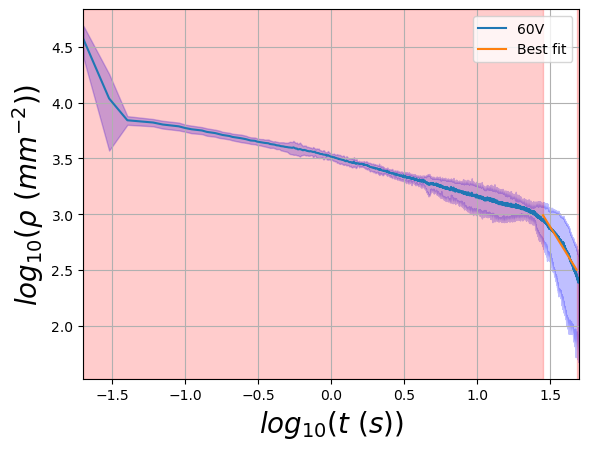

In [190]:

res = np.polyfit(np.log10(t[a:b]), np.log10(S_den_avg[a:b]), deg=1, full=True)
print(res)
a, b = 2000,3400
plt.plot(np.log10(t), np.log10(S_den_avg), label ='60V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b]) + res[0][1], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-2*S_den_sd), np.log10(S_den_avg+2*S_den_sd), color='blue', alpha=0.25)
plt.axvspan(xmin=-1.7, xmax=np.log10(t[a]), color='red', alpha=0.2)
plt.axvspan(xmin=np.log10(t[b]), xmax=1.7, color='red', alpha=0.2)
plt.xlim([-1.7, 1.7])
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend(loc=1)

In [34]:
t = np.linspace(0, 20,  2001)

t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.998e+01, 1.999e+01,
       2.000e+01])

In [47]:
res[1], res[0][0]

(array([0.05376864]), np.float64(-0.6447987583816548))

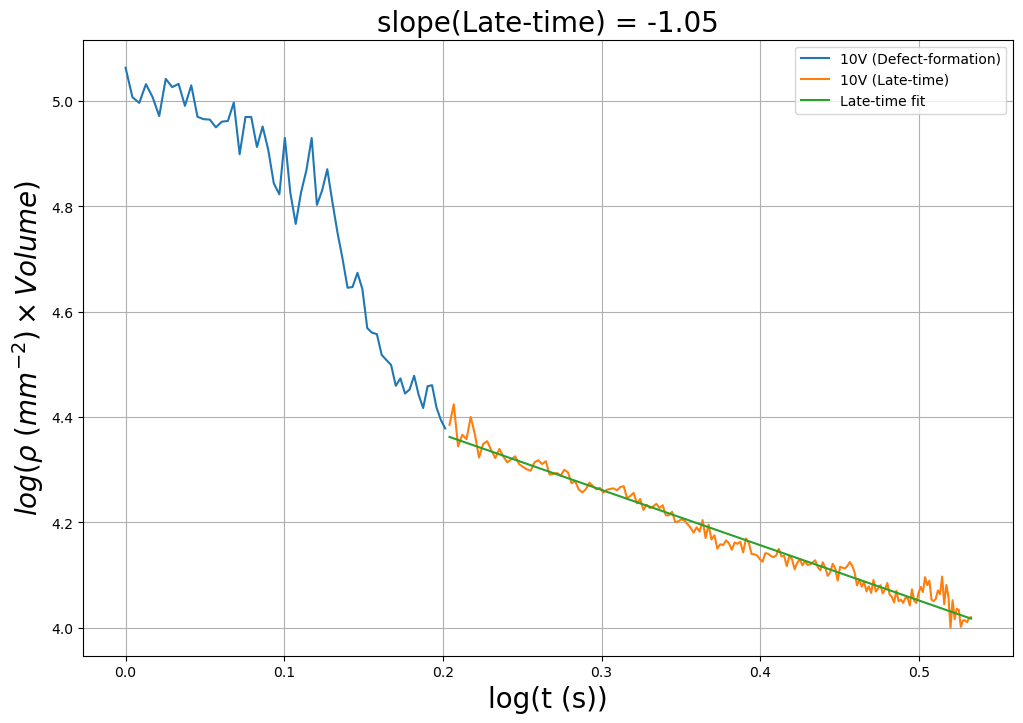

In [12]:
fig = plt.figure(figsize=(12, 8))

a1, b1, c1 = 258, 318, 498
t_10_1_ = t_10_1 - (t_10_1[a1] -1)
plt.plot(np.log10(t_10_1_[a1:b1]), np.log10(S_dyn_10_1[a1:b1]), label = '60V (Defect-formation)')
plt.plot(np.log10(t_10_1_[b1:c1]), np.log10(S_dyn_10_1[b1:c1]), label = '60V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_10_1_[b1:c1]), np.log10(S_dyn_10_1[b1:c1]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_10_1_[b1:c1]), slope_ * np.log10(t_10_1_[b1:c1]) + intersect_, label = 'Late-time fit')


plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/60V-rho_dyn.png')

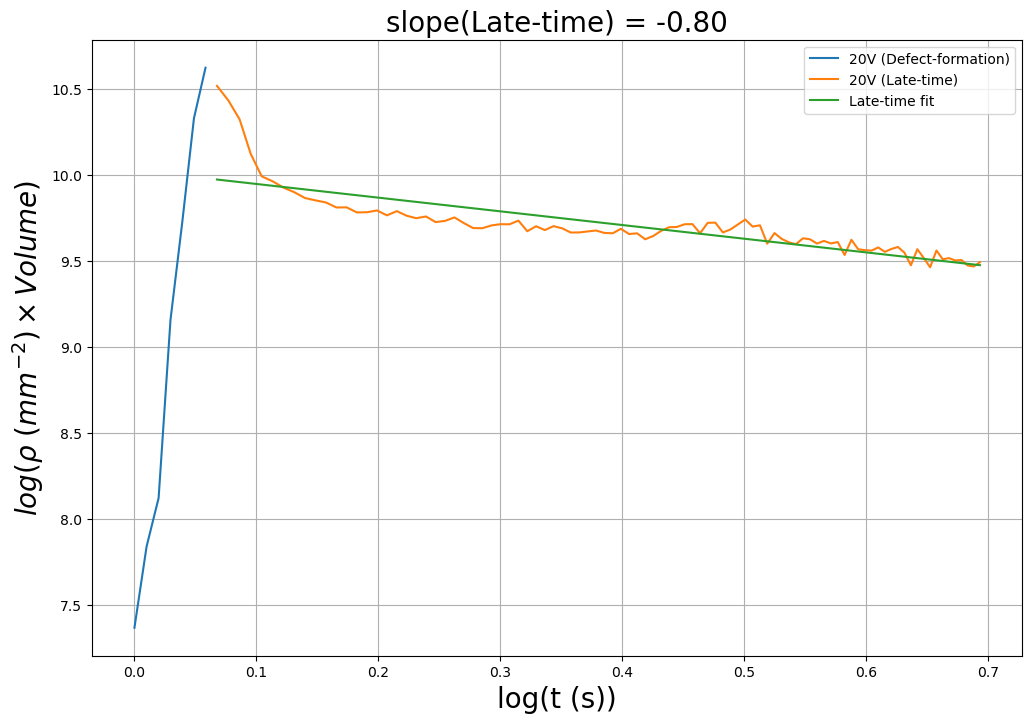

In [7]:
fig = plt.figure(figsize=(12, 8))

a2, b2, c2 = 78, 85, 178
t_20_ = t_20 - (t_20[a2] -1)
plt.plot(np.log10(t_20_[a2:b2]), np.log10(S_dyn_20[a2:b2]), label = '20V (Defect-formation)')
plt.plot(np.log10(t_20_[b2:c2]), np.log10(S_dyn_20[b2:c2]), label = '20V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_20_[b2:c2]), np.log10(S_dyn_20[b2:c2]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_20_[b2:c2]), slope_ * np.log10(t_20_[b2:c2]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/20V-rho_dyn.png')

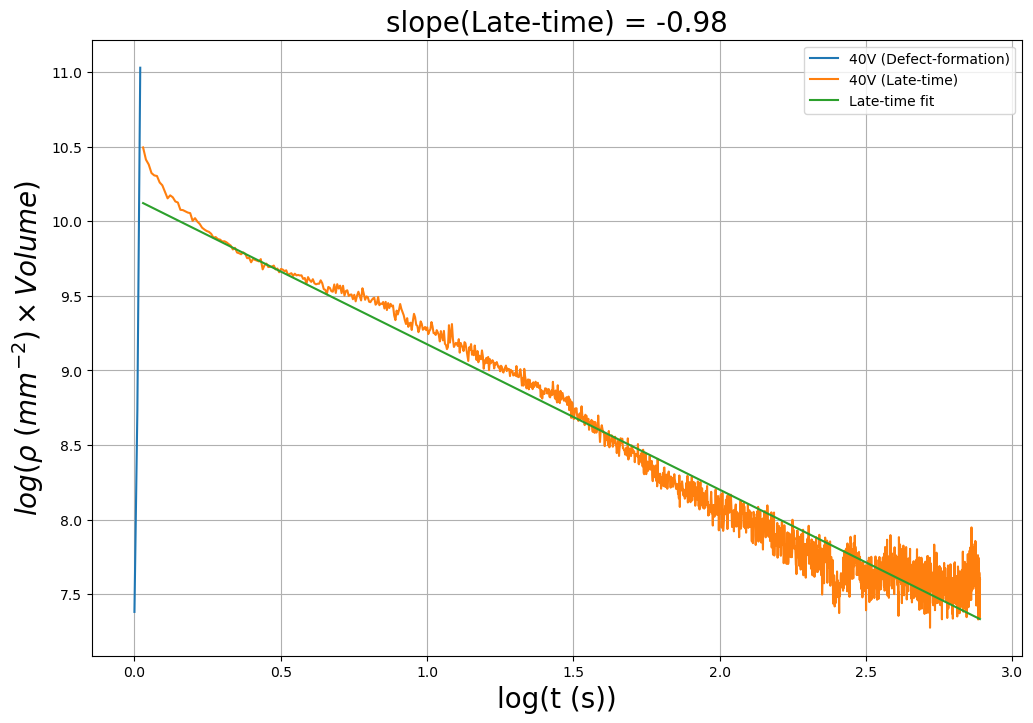

In [8]:
fig = plt.figure(figsize=(12, 8))

a4, b4, c4 = 123, 126, -1
t_40_ = t_40 - (t_40[a4] -1)
plt.plot(np.log10(t_40_[a4:b4]), np.log10(S_dyn_40[a4:b4]), label = '40V (Defect-formation)')
plt.plot(np.log10(t_40_[b4:c4]), np.log10(S_dyn_40[b4:c4]), label = '40V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_40_[b4:c4]), np.log10(S_dyn_40[b4:c4]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_40_[b4:c4]), slope_ * np.log10(t_40_[b4:c4]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/40V-rho_dyn.png')

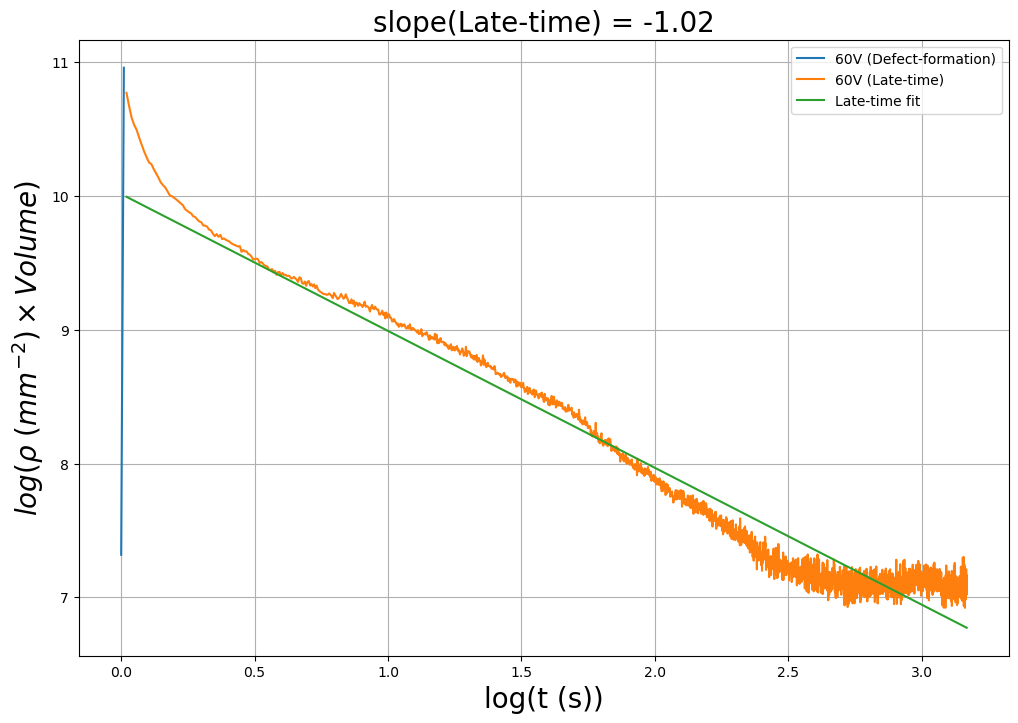

In [9]:
fig = plt.figure(figsize=(12, 8))

a6, b6, c6 = 120, 122, -1
t_60_ = t_60 - (t_60[a6] -1)
plt.plot(np.log10(t_60_[a6:b6]), np.log10(S_dyn_60[a6:b6]), label = '60V (Defect-formation)')
plt.plot(np.log10(t_60_[b6:c6]), np.log10(S_dyn_60[b6:c6]), label = '60V (Late-time)')

slope_, intersect_ = np.polyfit(np.log10(t_60_[b6:c6]), np.log10(S_dyn_60[b6:c6]), deg=1)
plt.title('slope(Late-time) = {:.2f}'.format(slope_))
plt.plot(np.log10(t_60_[b6:c6]), slope_ * np.log10(t_60_[b6:c6]) + intersect_, label = 'Late-time fit')

plt.grid()
plt.xlabel('log(t (s))')
plt.ylabel(r'$log(\rho\ (mm^{-2}) \times Volume)$')
plt.legend()
# plt.savefig('../figs/60V-rho_dyn.png')

## Defect Formation Dynamics

In [13]:
freq = 10e3 #10kHz
t_period = 1/freq


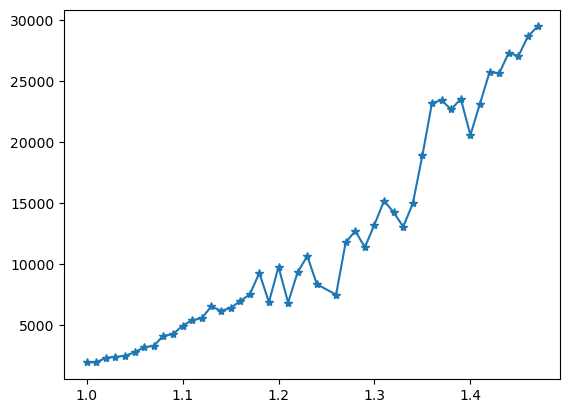

In [10]:

plt.plot(t_10_[a1:b1], S_dyn_10[a1:b1], '*-')

In [14]:
r10 = 10/t_period
r20 = 20/t_period
r40 = 40/t_period
r60 = 60/t_period



ramp_rate = [r10, r20, r40, r60]
ini_rho = [S_dyn_10[b1-1], S_dyn_20[b2-1], S_dyn_40[b4-1], S_dyn_60[b6-1]]

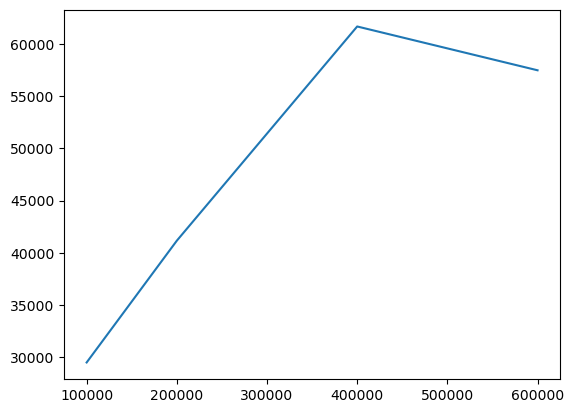

In [15]:
plt.plot(ramp_rate, ini_rho)

In [36]:
list(range(0, 10, 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]